<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Kyriacos Kyriacou, kyr
    
## <center> Tutorial
### <center> Bring your plots to life with Matplotlib animations

### 1. Introduction

Early on in our journey at mlcourse.ai we were taught how to create plots describing our data so that we could gain insights on patterns and relationships that might exist. As the course progressed, we found ourselves constantly creating plots in order to assist us in all kinds of tasks: Whether it was for exploratory data analysis, visualizing results from machine learning (ML) algorithms such as decision trees, or for comparing results using validation curves, plots were prominent everywhere.

In this tutorial, we'll take plotting a step further by learning how to animate them, using a library we're all familiar with, <i>matplotlib</i>.

### 2. Matplotlib animations

Luckily for us, matplotlib already provides excellent libraries for creating animations.

Matplotlib provides two classes for creating animations: [FuncAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation) and [ArtistAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib.animation.ArtistAnimation).

With the former, an animation is created repeatedly by calling an update function, whereas with the latter frames are precomputed and then animated. We'll be taking a look at both in this tutorial.

When using either of the animation classes, it is imperative to keep a reference to the instance object. The animation is advanced by a timer which the `Animation` object holds the only reference to. If you don't hold that reference, the object will be garbage collected which stops the animation. This is inconsistent with other plotting functions of `matplotlib`, where you can use `plt.plot()` without storing the result, so this is an important point to remember.

Let's look at some code for animating the <i>cosine</i> function, and then we'll dive into explaining each function and the `FuncAnimation` API.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc={"figure.figsize": (10, 7)})

import warnings

warnings.filterwarnings("ignore")

# to display animation in notebook
from IPython.display import HTML
from matplotlib.animation import ArtistAnimation, FuncAnimation
# %matplotlib notebook


In [ ]:
fig, ax = plt.subplots()
ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))
ax.grid(True)
# create a line which we'll animate
(line,) = plt.plot([], [], lw=2)

# function used to draw a clear frame
def init():
    line.set_data([], [])
    return (line,)


# called sequentialy on each frame
def update(frame):
    x = np.linspace(0, 2, 1000)
    y = np.cos(2 * np.pi * (x - 0.01 * frame))
    line.set_data(x, y)
    return (line,)


# hide static plot
plt.close()

ani = FuncAnimation(fig, update, frames=100, interval=20, init_func=init, blit=True)
HTML(ani.to_html5_video())
# ani.save('cosine_function.mp4', fps=30)

Let's look at important parameters of `FuncAnimation` API:

`matplotlib.animation.FuncAnimation(fig, func, frames=None, interval=None, init_func=None, blit=True)`

- **fig**: The figure object that is used to draw 
- **func**: The function to call on each frame
- **frames**: How many frames to animate. If None, passes itertools.count
- **interval**: Delay between consecutive frames in milliseconds
- **init_func**: Function used to draw a clear frame. Called once before the first frame
- **blit**: Controls whether blitting is used. Blitting optimizes the animation by only redrawing parts that have changed

Let's go through each part of the code together:

```python
fig, ax = plt.subplots()
ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))
ax.grid(True)
line, = plt.plot([], [], lw=2)
```

First, we create a figure and axes, and then set the limits of the y and x coordinates. Then, we create a line (with no points), which we'll be animating in our plot. If we wanted to animate another line, we'd also create it here.

```python
def init():
    line.set_data([], [])
    return line,
```

Here, we define the init function which is the function that is used to draw a clear frame. The function must return a touple of all objects that will be animated, in this case it's a single line so we return a touple of length 1.

```python
def update(frame):
    x = np.linspace(0, 2, 1000)
    y = np.cos(2 * np.pi * (x - 0.01 * frame))
    line.set_data(x, y)
    return line,
```

This is the update function, the guts of the animation. This function is called sequentially in each frame of the animation. It is in this function that we calculate the new coordinates of the object that we are animating.

The `frame` parameter is the current frame number. The update function can receive additional parameters using the `fargs` parameter in `FuncAnimation` method.

```python
ani = FuncAnimation(fig, update, frames=100, interval=20, init_func=init, blit=True)
HTML(ani.to_html5_video())
```

Finally, we call the `FuncAnimation` method using the parameters explained earlier. As you can see, we are saving a reference to the animation using the `ani` parameter. If we didn't, then no animation would take place.

Using `IPython.display.HTML`, we display the animation in the jupyter notebook. 

Alternatively, we could have saved the animation to a file using:

`ani.save('cosine_function.mp4', fps=30)`

If you have problems saving the animation, ensure you have `ffmpeg` or `menencoder` installed.

From now on, instead of having to call `HTML` each time, we will set a parameter so that simply calling the animation object will display the animation in the notebook.

In [ ]:
plt.rcParams["animation.html"] = "html5"
ani

### 3. Animating multiple objects

Now that we're familiar with animating a single object, let's go further by animating multiple objects. Let's add a <i>sine</i> line and display the frame number:

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))
ax.grid(True)

frame_text = ax.text(0.05, 1.9, "", bbox=dict(facecolor="white", alpha=1))
(cos_line,) = plt.plot([], [], lw=2, c="b", label="cos")
(sin_line,) = plt.plot([], [], lw=2, c="r", label="sin")
plt.legend()

# function used to draw a clear frame
def init():
    cos_line.set_data([], [])
    sin_line.set_data([], [])
    frame_text.set_text("")
    return cos_line, sin_line, frame_text


# called sequentialy on each frame
def update(frame):
    x = np.linspace(0, 2, 1000)
    cos_x = np.cos(2 * np.pi * (x - 0.01 * frame))
    sin_x = np.sin(2 * np.pi * (x - 0.01 * frame))
    cos_line.set_data(x, cos_x)
    sin_line.set_data(x, sin_x)
    frame_text.set_text("frame = %d" % frame)
    return cos_line, sin_line, frame_text


# hide static plot
plt.close()

ani = FuncAnimation(fig, update, frames=150, interval=20, init_func=init, blit=True)
ani

### 4. Animating KMeans

Even though I'm sure looking at a cos/sin animated plot is a lot of fun, let's create some animations which can be useful for us in our ML journey. 

In Topic 7, we learned about clustering algorithms, and in particular K-Means. However, we were only able to plot the final clusters after all iterations had completed. It would be more interesting to see how clusters form and change throughout each iteration. Sounds like an animation is perfect for this!

We'll be using the iris dataset for this task. Since the iris dataset consists of three features, let's use PCA to reduce that down to 2, so we can plot it in 2 dimensions, just as we did in Topic 7:

In [ ]:
from sklearn import datasets, decomposition
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
X_pca.shape

Let's first take a look at our data with the real labels:

In [ ]:
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], "bo", label="Setosa")
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], "go", label="Versicolour")
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], "yo", label="Virginica")
plt.grid(False)
plt.legend(loc=0);

Unfortunately, sklearn does not provide a way to view historical data of centroids - that is, we can only see the final centroid locations after <i>n</i> iterations, but we want to see the centrois at each iteration. There are two ways around this, we can either create our own implementation of KMeans which stores and returns centroid location after each iteration or with a little ingenuity we can use KMeans from sklearn to get the centrois on each iteration.

I'll initialize the centroids myself, and then consecutively call KMeans with a fixed random random state and initial centroids, and at each iteration I'll increment the `max_iter` parameter by 1 and fit to the data. This way, on each iteration of our loop, we can look at the centroids. It'll make more sense when u read the code.

For this animation we'll be using the `ArtistAnimation` class.

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim((-3.5, 4))
ax.set_ylim((-1.5, 1.5))
ax.grid(False)
ims = []

# initial centroids
init = np.array([-1, 0.5, 3, 1, 3, -0.5]).reshape((3, 2))

for i in range(10):
    txt = plt.text(
        -0.5, 1.4, "Iteration = {}".format(i + 1), bbox=dict(facecolor="white", alpha=1)
    )

    kmeans = KMeans(n_clusters=3, init=init, max_iter=i + 1, random_state=6)
    y = kmeans.fit_predict(X_pca, y)

    centers = plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r", marker="X"
    )
    (c1,) = plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], "bo")
    (c2,) = plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], "go")
    (c3,) = plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], "yo")
    ims.append([centers, c1, c2, c3, txt])

# hide static plot
plt.close()

ani = ArtistAnimation(fig, ims, interval=1500, repeat_delay=1000, blit=False)
ani

matplotlib.animation.ArtistAnimation(fig, artists, interval=200, blit=False, repeat_delay=None)

- **fig**: The figure object that is used to draw 
- **artists**: Each list entry a collection of matplotlib artists that represent what needs to be enabled on each frame. More info on artists: https://matplotlib.org/users/artists.html
- **interval**: Delay between consecutive frames in milliseconds
- **blit**: Controls whether blitting is used. Blitting optimizes the animation by only redrawing parts that have changed
- **repeat_delay**: If the animation in repeated, adds a delay in milliseconds before repeating the animation

Let's breakdown the code:

```python
fig, ax = plt.subplots()
ax.set_xlim((-3.5, 4))
ax.set_ylim((-1.5, 1.5))
ax.grid(False)
ims = []
```

Prepare figure and axes, and create ims array which will hold the artists for each iteration.

```python
init = np.array([-1, 0.5, 3, 1, 3, -0.5]).reshape((3,2))
for i in range(10):
    txt = plt.text(-.5, 1.4, 'Iteration = {}'.format(i+1), bbox=dict(facecolor='white', alpha=1)) 
    kmeans = KMeans(n_clusters=3, init=init, max_iter=i+1, random_state=6)
    y = kmeans.fit_predict(X_pca, y)
    centers = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', marker='X')
    c1, = plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo')
    c2, = plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go')
    c3, = plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'yo')
    ims.append([centers, c1, c2, c3, txt])
```

First, create initial centroids and place them in init array. Then, loop over the number of iterations we want to run KMeans for.

In each iteration, we perform KMeans up to that iteration, and obtain the cluster predictions and the new centroids for that iteration. Update each new cluster using `plt.plot`, and draw new centroid locations with `plt.scatter`. All objects returned from `plt.text`, `plt.scatter` and `plt.plot` are artists which must be appended to the `ims` array in a list.

```python
plt.close()   
ani = ArtistAnimation(fig, ims, interval=1500, repeat_delay=1000, blit=False)
ani
```

Finally, hide the static plot using `plt.close`, and display the animation using `ArtistAnimation`.

### 5. Animating Decision Tree Boundaries

Now let's look at how the Decision Tree boundary changes while changing the `max_depth` parameter. We'll be able to see an animation of the tree fitting to the data and eventually overfitting!

To generate and display points I'll be using code from Topic 3 of mlcourse.ai.

In [ ]:
# generate points
np.random.seed(6)

class_1 = np.random.normal(size=(50, 2))
class_1_lbl = np.zeros(50)
class_2 = np.random.normal(size=(50, 2), loc=1.8)
class_2_lbl = np.ones(50)

train_data = np.r_[class_1, class_2]
train_labels = np.r_[class_1_lbl, class_2_lbl]

plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1,
);

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


fig, ax = plt.subplots()
ax.grid(False)
ims = []
xx, yy = get_grid(train_data)

for i in range(8):
    txt = plt.text(
        0, 4.5, "DT max depth = {}".format(i + 1), bbox=dict(facecolor="white", alpha=1)
    )

    pred = (
        DecisionTreeClassifier(criterion="gini", max_depth=i + 1, random_state=17)
        .fit(train_data, train_labels)
        .predict(np.c_[xx.ravel(), yy.ravel()])
        .reshape(xx.shape)
    )
    pcm = ax.pcolormesh(xx, yy, pred, cmap="autumn")

    pts = plt.scatter(
        train_data[:, 0],
        train_data[:, 1],
        c=train_labels,
        s=100,
        cmap="autumn",
        edgecolors="black",
        linewidth=1,
    )
    ims.append([pcm, pts, txt])

# hide static plot
plt.close()

ani = ArtistAnimation(fig, ims, interval=2000, repeat_delay=1000, blit=False)
ani

As you can see above the three starts overfitting at max depth = 4. The code is more or less the same as the code for the KMeans visualization, and as such I will not explain each part.

### 6. Further Examples

Matplotlib has many examples of animations [here](https://matplotlib.org/api/animation_api.html#examples). I'll show one below which displays 3-D capabilities:

In [5]:
# taken from https://matplotlib.org/gallery/animation/random_walk.html

import mpl_toolkits.mplot3d.axes3d as p3

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = (np.random.rand(dims) - 0.5) * 0.1
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
# print(data)
# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel("X")

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel("Y")

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel("Z")

ax.set_title("3D Test")

plt.close()

# Creating the Animation object
ani = FuncAnimation(fig, update_lines, 25, fargs=(data, lines), interval=50, blit=False)

# Animation doesn't work in VS code but works flawless in Jupyter (browser)
# ani

# Workaround is to generate a video and view it.
HTML(ani.to_html5_video())

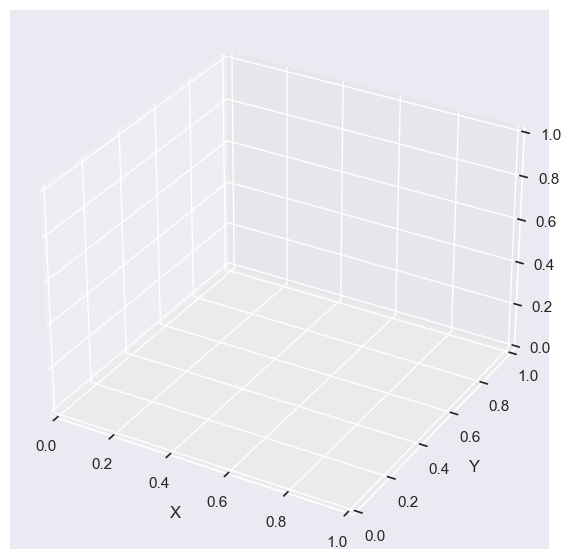

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = FuncAnimation(fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

In [3]:
HTML(ani.to_html5_video())

### 7. Conclusion

Matplotlib provides great capability for animations straight out of the box! We saw that through usage of the `FuncAnimation` or the `ArtistAnimation` class, we have a lot of power in our hands for producing animations. We can plot mathematical functions, clusters and decision boundaries from our ML algorithms and even animate 3-D plots.

Animations can be used to help us understand how our ML algorithms are workings, or they can be used to produce awesome animations to show off in your next blog post. Either way, the possibilites are endless.

Have fun animating!

### 8. References

1. https://matplotlib.org/api/animation_api.html
2. https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation
3. https://matplotlib.org/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib.animation.ArtistAnimation
4. https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
5. https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true
6. https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic07_unsupervised/topic7_pca_clustering.ipynb?flush_cache=true